In [23]:
from keras.datasets import cifar10
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
 
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# load model
	model = load_model('final_model.h5')
	# evaluate model on test dataset
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('accuracy> %.3f' % (acc * 100.0))
 
# entry point, run the test harness
run_test_harness()

accuracy> 74.600


In [24]:
# make a prediction for a new image.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

import numpy as np

In [25]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [26]:
# load an image and predict the class
def run_example():
  # plot img
  img1 = mpimg.imread('sample.png')
  imgplot = plt.imshow(img1)
  plt.show()
	# load the image
  img = load_image('sample.png')
	# load model
  model = load_model('final_model.h5')
	# predict the class
  result = np.argmax(model.predict(img), axis=-1)
  
  print('\n\n')
  if result[0] == 0:
    print("airplane")
  elif result[0] == 1:
      print("automobile")
  elif result[0] == 2:
      print("bird")
  elif result[0] == 3:
      print("cat")
  elif result[0] == 4:
      print("deer")
  elif result[0] == 5:
      print("dog")
  elif result[0] == 6:
      print("frog")
  elif result[0] == 7:
      print("horse")
  elif result[0] == 8:
      print("ship")
  elif result[0] == 9:
      print("truck")
  else:
      print("Not in the list")

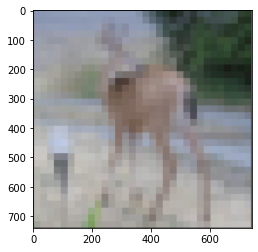




deer


In [27]:
 
# entry point, run the example
run_example()

I get warning about predict_classes which is not used insted we will use below (i get it from stack overflow):

   *  np.argmax(model.predict(x), axis=-1), if your model does multi-class
classification (e.g. if it uses a softmax last-layer activation).
   * (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
